In [ ]:
# oca.ancine.gov.br
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/filmes.xlsx', skiprows=2, skipfooter=16)

In [ ]:
df.shape

(5691, 10)

In [ ]:
df.head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30 00:00:00,Cineart Filmes,Distribuição Nacional,714,9437.45
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28 00:00:00,Ponto de Equilíbrio,Distribuição Nacional,7,63.00
2,2017,120 batimentos por minuto,Ficção,França,Estrangeiros,2018-01-04 00:00:00,Imovision,Distribuição Nacional,262,3791.63
3,2017,13 Minutos,Ficção,Alemanha,Estrangeiros,2016-11-03 00:00:00,Alphaville Filmes,Distribuição Nacional,620,6463.50
4,2017,150 Miligramas,Ficção,França,Estrangeiros,2017-08-31 00:00:00,Califórnia,Distribuição Nacional,771,10508.71


In [ ]:
df.tail()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5686,2009,X-Men Origens: Wolverine,Ficção,Estados Unidos,Estrangeiros,2009-05-01 00:00:00,Fox,Distribuição Internacional,3199434,27352313.00
5687,2009,Xuxa em o Mistério de Feiurinha,Ficção,Brasil,Brasileiros,2009-12-25 00:00:00,Playarte,Distribuição Nacional,250109,1766416.65
5688,2009,Xuxa em Sonho de Menina,Ficção,Brasil,Brasileiros,2007-12-21 00:00:00,Warner,Distribuição Internacional,8914,26880.00
5689,2009,Xuxa Gêmeas,Ficção,Brasil,Brasileiros,2006-12-15 00:00:00,Fox,Distribuição Internacional,1671,5013.00
5690,2009,Zico na Rede,Documentário,Brasil,Brasileiros,2009-07-03 00:00:00,Business Telecom,Distribuição Nacional,546,2529.50


In [ ]:
df.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [ ]:
# df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])
# erro

In [ ]:
df['Data de lançamento'].value_counts()
# "Relancameneto não é data"

Relançamento           175
2015-12-03 00:00:00     33
2012-12-21 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2018-03-29 00:00:00      1
2002-11-01 00:00:00      1
2004-11-12 00:00:00      1
2007-05-25 00:00:00      1
2006-06-02 00:00:00      1
Name: Data de lançamento, Length: 759, dtype: int64

In [ ]:
#Exibir filmes com a data "Relancamento"
df[df['Data de lançamento'] == 'Relançamento'][['Ano de exibição', 'Título da obra', 'Gênero', 'Data de lançamento']].head()

,Ano de exibição,Título da obra,Gênero,Data de lançamento
7,2017,8½,Ficção,Relançamento
11,2017,A bela da tarde,Ficção,Relançamento
36,2017,A História sem Fim,Ficção,Relançamento
53,2017,A primeira noite de um homem,Ficção,Relançamento
128,2017,Ballet Bolshoi: A bela adormecida,Vídeomusical,Relançamento


In [ ]:
# criar novo dataframe com copy
df2 = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [ ]:
df2.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [ ]:
df2['Data de lançamento'] = pd.to_datetime(df2['Data de lançamento'])

In [ ]:
df2.dtypes

Ano de exibição                             int64
Título da obra                             object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [ ]:
#Anos que tiveram mais filmes lançados
df2['Data de lançamento'].dt.year.value_counts()

2013    669
2015    646
2014    619
2016    613
2011    553
2012    539
2009    503
2017    487
2010    475
2008    225
2007     61
2006     49
2005     29
2018     17
2004     10
2002      6
2001      5
2003      4
1999      3
2000      2
1998      1
Name: Data de lançamento, dtype: int64

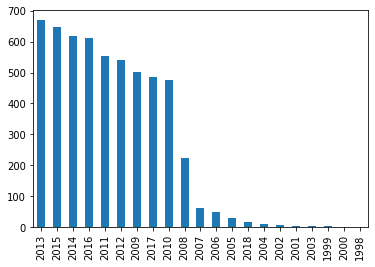

In [ ]:
df2['Data de lançamento'].dt.year.value_counts().plot.bar()

In [ ]:
# maior bilheteria
df2[df2['Renda (R$) no ano de exibição'] == df2['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,146184931.0


In [ ]:
# 3 maiores bilheterias
df2.nlargest(3, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
893,2016,Capitão América: Guerra civil,Ficção,Estados Unidos,Estrangeiros,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
2242,2015,Velozes e Furiosos 7,Ficção,Estados Unidos,Estrangeiros,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08


In [ ]:
#menor bilheteria
df2[df2['Renda (R$) no ano de exibição'] == df2['Renda (R$) no ano de exibição'].min()].head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2277,2014,A Batalha do passinho,Documentário,Brasil,Brasileiros,2013-10-11,Cine Santa Teresa,Distribuição Nacional,355,0.0
2608,2014,Mar negro,Ficção,Brasil,Brasileiros,2014-01-17,Petrini,Distribuição Nacional,0,0.0
2728,2014,O Último Lance do Leilão,Ficção,Brasil,Brasileiros,2014-05-01,Sam Rádio Pictures,Distribuição Nacional,0,0.0
3041,2013,As horas vulgares,Ficção,Brasil,Brasileiros,2013-08-09,Petrini,Distribuição Nacional,0,0.0
3058,2013,Beije-me outra vez,Ficção,Itália,Estrangeiros,2013-05-10,Petrini,Distribuição Nacional,0,0.0


In [ ]:
df2['Nacionalidade da obra'].value_counts()

Estrangeiros    3902
Brasileiros     1614
Name: Nacionalidade da obra, dtype: int64

In [ ]:
df2['País(es) produtor(es) da obra'].value_counts()


Estados Unidos                            1682
Brasil                                    1508
França                                     545
Reino Unido                                 80
Argentina                                   74
                                          ... 
Alemanha, Áustria, França                    1
Austrália, Suécia                            1
França, Itália, Qatar, Tunísia               1
Estados Unidos, Turquia                      1
Brasil, Estados Unidos, França, Itália       1
Name: País(es) produtor(es) da obra, Length: 381, dtype: int64

#Câmara dos Deputados

In [ ]:
# dadosabertos.camera.leg.br

In [69]:
import requests

In [ ]:
# URL de acesso aos dados via api
url = 'https://dadosabertos.camara.leg.br/api/v2/partidos?itens=100'

resposta = requests.get(url)

# texto de retorno da requisicao
resposta.text

'{"dados":[{"id":36898,"sigla":"AVANTE","nome":"Avante","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36898"},{"id":37905,"sigla":"CIDADANIA","nome":"Cidadania","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37905"},{"id":37902,"sigla":"DC","nome":"Democracia Cristã","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37902"},{"id":36769,"sigla":"DEM","nome":"Democratas","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36769"},{"id":36899,"sigla":"MDB","nome":"Movimento Democrático Brasileiro","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36899"},{"id":37901,"sigla":"NOVO","nome":"Partido Novo","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37901"},{"id":37900,"sigla":"PATRI","nome":"Patriota","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37900"},{"id":37907,"sigla":"PATRIOTA","nome":"Patriota","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37907"},{"id":36863,"sigla":"PCB","nome":"Partido Constituciona

In [ ]:
df = pd.DataFrame(resposta.json()['dados'])
df.head()

,id,sigla,nome,uri
0,36898,AVANTE,Avante,https://dadosabertos.camara.leg.br/api/v2/part...
1,37905,CIDADANIA,Cidadania,https://dadosabertos.camara.leg.br/api/v2/part...
2,37902,DC,Democracia Cristã,https://dadosabertos.camara.leg.br/api/v2/part...
3,36769,DEM,Democratas,https://dadosabertos.camara.leg.br/api/v2/part...
4,36899,MDB,Movimento Democrático Brasileiro,https://dadosabertos.camara.leg.br/api/v2/part...


In [ ]:
# Quantidade de partidos
df.sigla.count()

40

In [ ]:
df.nome

0                                             Avante
1                                          Cidadania
2                                  Democracia Cristã
3                                         Democratas
4                   Movimento Democrático Brasileiro
5                                       Partido Novo
6                                           Patriota
7                                           Patriota
8              Partido Constitucionalista Brasileiro
9                        Partido Comunista do Brasil
10                         Partido da Causa Operária
11                   Partido Democrático Trabalhista
12                Partido Humanista da Solidariedade
13                                   Partido Liberal
14                      Partido da Mulher Brasileira
15                   Partido da Mobilização Nacional
16                                           Podemos
17                                     Progressistas
18                              Partido Pátria

In [ ]:
# O iloc retorna um campo com base no seu índice [linha, coluna]
df.iloc[0, 3]

'https://dadosabertos.camara.leg.br/api/v2/partidos/36898'

In [ ]:
# O loc retorna o campo com base no nome das colunas
df.loc[0, 'uri']

'https://dadosabertos.camara.leg.br/api/v2/partidos/36898'

#Análise Dados Copa do Mundo - Raspagem de Dados

In [89]:
# URL de acesso aos dados via api
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

resposta = requests.get(url)

tabela = pd.read_html(resposta.text)
df = tabela[11]

In [90]:
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [91]:
# df.columns = df.iloc[0]
# df.drop(df.index[0], inplace=True)

In [92]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [95]:
# df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

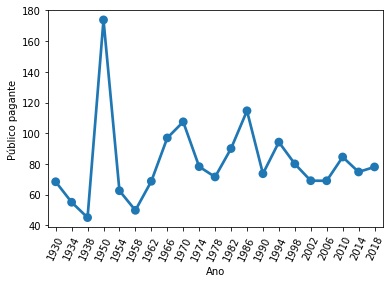

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.pointplot(x='Ano', y='Público pagante', data=df)

# Ajustando legenda dos anos 
plt.xticks(rotation=65)
plt.show()